<a href="https://colab.research.google.com/github/975125089qq/Simple_game--Pygame/blob/main/FootstepClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import and Install Dependencies

## 1.1 Install Dependencies

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !pip install tensorflow tensorflow-gpu  matplotlib
!pip install tensorflow-io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 20.0 MB/s eta 0:00:00


## 1.2 Load Dependencies

In [1]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

# 2. Build Data Loading Function

## 2.2 Build Dataloading Function

In [2]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

# 3. Create Tensorflow Dataset

## 3.1 Define Paths to Positive and Negative Data

In [3]:
def return_slices(FILEPATH):
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=11200, sequence_stride=11200, batch_size=1)
    return audio_slices

In [4]:
#森田
S01 = os.path.join('/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw', 'S01')
S02 = os.path.join('/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw', 'S02')
S03 = os.path.join('/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw', 'S03')
S04 = os.path.join('/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw', 'S04')
S05 = os.path.join('/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw', 'S05')
S06 = os.path.join('/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw', 'S06')
S07 = os.path.join('/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw', 'S07')
S08 = os.path.join('/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw', 'S08')
S09 = os.path.join('/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw', 'S09')
S10 = os.path.join('/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw', 'S10')
S11 = os.path.join('/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw', 'S11')
S12 = os.path.join('/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw', 'S12')
S13 = os.path.join('/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw', 'S13')

SS = [S01, S02, S03, S04, S05, S06, S07, S08, S09, S10, S11, S12, S13]


## 3.2 Create Tensorflow Datasets

In [5]:
#森田
import os

s01 = []
s02 = []
s03 = []
s04 = []
s05 = []
s06 = []
s07 = []
s08 = []
s09 = []
s10 = []
s11 = []
s12 = []
s13 = []

ss = [s01, s02, s03, s04, s05, s06, s07, s08, s09, s10, s11, s12, s13]

for n in range(13):
    
  for i in os.listdir(SS[n]):
    # CALCULATE NUM
    wav = load_wav_16k_mono(SS[n] + '/' + i)
    wav = wav[:int(len(wav) * 0.7)]

    # !!!!!!!!!!!!!!!!!!!!!!!!!!短縮版！！！！！！！！！！！！！！
    NUM = int(len(wav) / (0.75 * 16000)/5)

    for j in range(NUM):
      ss[n].append(os.path.join(SS[n],i+str(j)))

  ss[n] = tf.data.Dataset.from_tensor_slices(ss[n])



## 3.3 Add labels and Combine Positive and Negative Samples

In [6]:
#森田
# data = tf.data.Dataset()
sis = []
for i in range(13):

  indices = i
  depth = 13    

  sis.append( tf.data.Dataset.zip((ss[i], tf.data.Dataset.from_tensor_slices(([tf.one_hot(indices, depth)]*len(ss[i]))))) )

for i in range(len(sis)-1):
  sis[0] = sis[0].concatenate(sis[i+1])
data = sis[0]

print(len(data))

print(data.as_numpy_iterator().next())

2810
(b'/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw/S01/S01_1_footstep_audio.wav0', array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))


# 4. Determine Average Length of a Capuchin Call

# 5. Build Preprocessing Function to Convert to Spectrogram

## 5.1 Build Preprocessing Function

In [62]:
# import numpy as np
# def my_numpy_func(x):
#   # x will be a numpy array with the contents of the input to the
#   # tf.function
#   return np.sinh(x)
# @tf.function(input_signature=[tf.TensorSpec(None, tf.float32)])
# def tf_function(input):
#   y = tf.numpy_function(my_numpy_func, [input], tf.float32)
#   return y * y
# tf_function(tf.constant(1.))


def preprocess(file_path, label):
    num = ""
    for i in reversed(file_path):
      if 48<=i<=57:
        num = chr(i) + num
      else:
        break
    wav = load_wav_16k_mono(file_path[:-len(num)])

    num = int(num)
    print(num)
    

    ###
    wav_clip = wav[12000*num:12000+12000*num]
    spectrogram = tf.signal.stft(wav_clip, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

    # # 　分けないと問題ないですが、
    # spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    # spectrogram = tf.abs(spectrogram)
    # spectrogram = tf.expand_dims(spectrogram, axis=2)
    # return spectrogram, label

# 6. Create Training and Testing Partitions

## 6.1 Create a Tensorflow Data Pipeline

In [63]:
# positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.one_hot(indices=[0]*len(pos),depth=2,on_value=1.0,off_value=0,axis=-1,dtype=tf.float32))))
# negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.one_hot(indices=[1]*len(neg),depth=2,on_value=1.0,off_value=0,axis=-1,dtype=tf.float32))))
# # positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
# # negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
# data = positives.concatenate(negatives)

import numpy as np
data_numpy = []
for i in data:
  data_numpy.append([i[0].numpy(), i[1].numpy()])

data_numpy_processed_X = []
data_numpy_processed_y = []

for i in data_numpy:
  spectrogram, label = preprocess(i[0],i[1])
  data_numpy_processed_X.append(spectrogram.numpy())
  data_numpy_processed_y.append(label)

  # spectrogram
print(len(data_numpy_processed_X))

# data = data.map(preprocess)
# data_numpy = [[]]
# # for i in data.take(1):
# #   # print(i[0].numpy())
# #   print(i[1].numpy())

# # 問題のところ、データセットの次元を変えたい。（flattenしたい）
# # data = data.flat_map(tf.data.Dataset.from_tensor_slices)
# data = data.cache()
# data = data.shuffle(buffer_size=1000)
# data = data.batch(16)
# data = data.prefetch(8)
# print(len(data))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


## 6.2 Split into Training and Testing Partitions

In [83]:
# train = data.take(36)
# test = data.skip(36).take(15)
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data_numpy_processed_X, data_numpy_processed_y, test_size=0.2)
train_X = np.array(train_X)
train_y = np.array(train_y)
test_X = np.array(test_X)
test_y = np.array(test_y)


data_numpy_processed_X = np.array(data_numpy_processed_X)
print(data_numpy_processed_X.shape)

# train_X = np.array(data_numpy_processed_X)
# train_y = np.array(data_numpy_processed_y)

# shuffle
print(train_X.shape)
indices = np.arange(train_X.shape[0])
np.random.shuffle(indices)
train_X = train_X[indices]
train_y = train_y[indices]

print(train_X.shape)
print(train_y.shape)
print(train_X.shape[1])

# save the data
# np.save("train_X",train_X)
# np.save("train_y",train_y)

(2810, 366, 257, 1)
(2248, 366, 257, 1)
(2248, 366, 257, 1)
(2248, 13)
366
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## データを読み込む

In [84]:
#　もしデータがすでに保存されているなら、直接読み込みます
import os
if os.path.exists("/content/drive/MyDrive/audio_processing/intern/model1_tem_var/train_X.npy"):
  train_X = np.load("train_X.npy")
  train_y = np.load("train_y,npy")

# 7. Build Deep Learning Model

## 7.1 Load Tensorflow Dependencies

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

## 7.2 Build Sequential Model, Compile and View Summary

In [86]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(train_X.shape[1], 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [87]:
model.compile('Adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 364, 255, 16)      160       
                                                                 
 conv2d_5 (Conv2D)           (None, 362, 253, 16)      2320      
                                                                 
 flatten_2 (Flatten)         (None, 1465376)           0         
                                                                 
 dense_4 (Dense)             (None, 32)                46892064  
                                                                 
 dense_5 (Dense)             (None, 13)                429       
                                                                 
Total params: 46,894,973
Trainable params: 46,894,973
Non-trainable params: 0
_________________________________________________________________


## 7.3 Fit Model, View Loss and KPI Plots

In [89]:
hist = model.fit(train_X, train_y, epochs=10, validation_split=0.2, batch_size = 32)   
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("my_model")

Epoch 1/10
57/57 [==============================] - 6s 83ms/step - loss: 2.6289 - accuracy: 0.0745 - val_loss: 2.5653 - val_accuracy: 0.0689
Epoch 2/10
57/57 [==============================] - 4s 71ms/step - loss: 2.5650 - accuracy: 0.0734 - val_loss: 2.5657 - val_accuracy: 0.0689
Epoch 3/10
57/57 [==============================] - 5s 90ms/step - loss: 2.5648 - accuracy: 0.0801 - val_loss: 2.5660 - val_accuracy: 0.0622
Epoch 4/10
57/57 [==============================] - 4s 75ms/step - loss: 2.5647 - accuracy: 0.0840 - val_loss: 2.5666 - val_accuracy: 0.0622
Epoch 5/10
57/57 [==============================] - 4s 73ms/step - loss: 2.5645 - accuracy: 0.0784 - val_loss: 2.5669 - val_accuracy: 0.0689
Epoch 6/10
57/57 [==============================] - 4s 73ms/step - loss: 2.5644 - accuracy: 0.0795 - val_loss: 2.5671 - val_accuracy: 0.0622
Epoch 7/10
57/57 [==============================] - 4s 73ms/step - loss: 2.5643 - accuracy: 0.0840 - val_loss: 2.5673 - val_accuracy: 0.0622
Epoch 8/10
57

In [93]:
print(type(hist))
print(hist.history.keys())

<class 'keras.callbacks.History'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


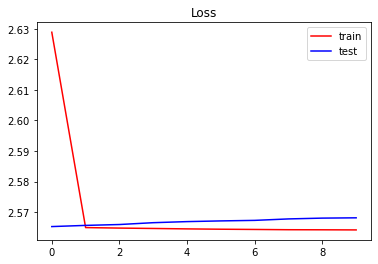

In [94]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r',label="train")
plt.plot(hist.history['val_loss'], 'b', label="test")
plt.legend()
plt.show()

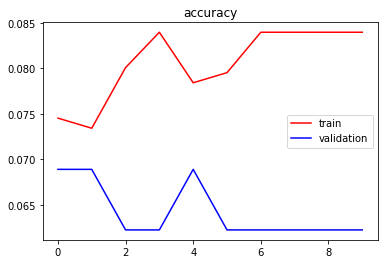

18/18 [==============================] - 0s 20ms/step
(562, 13)
0.0693950177935943


In [95]:
plt.title('accuracy')
plt.plot(hist.history['accuracy'], 'r', label="train")
plt.plot(hist.history['val_accuracy'], 'b', label="validation")
plt.legend()

plt.show()

result1 = model.predict(test_X)
print(result1.shape)
sum = 0
for i in range(len(result1)):
  if np.argmax(result1[i]) == np.argmax(test_y[i]):
    sum += 1
print(sum / len(test_y))

# **８.音声断片に対して分類を行う、


## モデルを直接読み込む

In [19]:
from tensorflow import keras
# It can be used to reconstruct the model identically.
if os.path.exists("/content/drive/MyDrive/audio_processing/intern/model1/my_model"):
  model = keras.models.load_model("my_model")

In [20]:
#森田
import os

t01 = []
t02 = []
t03 = []
t04 = []
t05 = []
t06 = []
t07 = []
t08 = []
t09 = []
t10 = []
t11 = []
t12 = []
t13 = []

ts = [t01, t02, t03, t04, t05, t06, t07, t08, t09, t10, t11, t12, t13]

for n in range(13):
    
  for i in os.listdir(SS[n]):
    # CALCULATE NUM
    wav = load_wav_16k_mono(SS[n] + '/' + i)
    # wav = wav[int(len(wav) * 0.7):]
    
    NUM = int(len(wav)*0.3 / (10 * 16000))

    for j in range(NUM):
      ts[n].append(os.path.join(SS[n],i+str(j)))


  ts[n] = tf.data.Dataset.from_tensor_slices(ts[n])


In [21]:
#森田
# data = tf.data.Dataset()
tis = []
for i in range(13):

  indices = i
  depth = 13    

  tis.append( tf.data.Dataset.zip((ts[i], tf.data.Dataset.from_tensor_slices(([tf.one_hot(indices, depth)]*len(ts[i]))))) )

for i in range(len(tis)-1):
  tis[0] = tis[0].concatenate(tis[i+1])
data_test = tis[0]
#positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
#negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
#data = positives.concatenate(negatives)

print(len(data_test))

print(data_test.as_numpy_iterator().next())

390
(b'/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw/S01/S01_1_footstep_audio.wav0', array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))


In [30]:
# !zip -r /content/my_model.zip /content/my_model
from google.colab import files
files.download("/content/my_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
def preprocess(file_path, label):
    num = ""
    for i in reversed(file_path):
      if 48<=i<=57:
        num = chr(i) + num
      else:
        break
    wav = load_wav_16k_mono(file_path[:-len(num)])

    num = int(num)
    print(num)

    wav_clip = wav[int(len(wav) * 0.7)+160_000*num:int(len(wav) * 0.7)+ 160_000+160_000*num]
    length_clip_clip = 0.75 * 16_000
    spectrogram_list = []
    print(len(wav), num)
    print(int(len(wav) * 0.7), 160_000*num, int(len(wav) * 0.7)+ 160_000+160_000*num)
    print(len(wav_clip), (length_clip_clip))
    print(int(len(wav_clip)/length_clip_clip))
    for i in range(int(len(wav_clip)/length_clip_clip)):
      wav_clip_clip = wav_clip[length_clip_clip * i: length_clip_clip + length_clip_clip * i]
      spectrogram = tf.signal.stft(wav_clip_clip, frame_length=320, frame_step=32)
      spectrogram = tf.abs(spectrogram)
      spectrogram = tf.expand_dims(spectrogram, axis=2)
      spectrogram_list.append(spectrogram.numpy)
    return spectrogram_list, label

In [59]:
import numpy as np
data_numpy_test = []
for i in data_test:
  data_numpy_test.append([i[0].numpy(), i[1].numpy()])

data_numpy_processed_X_test = []
data_numpy_processed_y_test = []

for i in data_numpy_test:
  spectrogram, label = preprocess(i[0],i[1])
  data_numpy_processed_X_test.append(spectrogram)
  data_numpy_processed_y_test.append(label)

  # spectrogram

test_X = np.array(data_numpy_processed_X_test)
test_y = np.array(data_numpy_processed_y_test)

# shuffle
print(test_X.shape)
indices = np.arange(test_X.shape[0])
np.random.shuffle(indices)
test_X = test_X[indices]
test_y = test_y[indices]

print(test_X.shape)
print(test_y.shape)
print(test_X.shape[1])

# save the data
np.save("test_X",test_X)
np.save("test_y",test_y)



48
49
50
51
52
48
49
50
51
52
48
49
50
51
52
48
49
50
51
52
48
49
50
51
52
48
49
50
51
52
48
49
50
51
52
48
49
50
51
52
48
49
50
51
52
48
49
50
51
52
48
49
50
51
52
48
49
50
51
52
48
49
50
51
52
48


KeyboardInterrupt: ignored

In [ ]:
import os
if os.path.exists("/content/drive/MyDrive/audio_processing/intern/model1_tem_var/test_X.npy"):
  test_X = np.load("test_X.npy")
  test_y = np.load("test_y.npy")

In [ ]:
# テストの精度を計算
sum_acc = 0
for index in range(len(test_X)):
  res_pos = model.predict(test_X[index])
  result_num = np.argmax(res_pos.sum(axis=0))
  if result_num == np.argmax(test_y[index]):
    sum_acc += 1
print("accuracy", sum_acc/len(test_y))

# 9.音声を読み込み、テストを行う

In [ ]:
file_path = "/content/drive/MyDrive/audio_processing/intern/AFPID-II/AFPID-Raw/S01/S01_1_footstep_audio_1.wav"
spectrogram_list = preprocess(file_path, None)[0]
res_pos = model.predict(spectrogram_list)
print("classification ",np.argmax(res_pos.sum(axis=0)))
  

# **予備**

# 8. Make a Prediction on a Single Clip

## 8.1 Get One Batch and Make a Prediction

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()

In [ ]:
yhat = model.predict(X_test)

## 8.2 Convert Logits to Classes 

In [ ]:
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]

# 9. Build Forest Parsing Functions

## 9.1 Load up MP3s

In [ ]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
mp3 = os.path.join('/content/drive/MyDrive/audio_processing/audioClassification/data', 'Forest Recordings', 'recording_00.mp3')

In [ ]:
wav = load_mp3_16k_mono(mp3)

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [ ]:
samples, index = audio_slices.as_numpy_iterator().next()

## 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [ ]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

## 9.3 Convert Longer Clips into Windows and Make Predictions

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [ ]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

## 9.4 Group Consecutive Detections

In [ ]:
from itertools import groupby

In [ ]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [ ]:
calls

# 10. Make Predictions

## 10.1 Loop over all recordings and make predictions

In [ ]:
results = {}
for file in os.listdir(os.path.join('/content/drive/MyDrive/audio_processing/audioClassification/data', 'Forest Recordings')):
    FILEPATH = os.path.join('/content/drive/MyDrive/audio_processing/audioClassification/data','Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

In [ ]:
results

## 10.2 Convert Predictions into Classes

In [ ]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

## 10.3 Group Consecutive Detections

In [ ]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

# 11. Export Results

In [ ]:
import csv

In [ ]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])

劉　問題コード


## 5.1 Build Preprocessing Function

In [ ]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    # audio_slices = 
    # audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=11200, sequence_stride=11200, batch_size=1)
    result_list = []
    wav_list = [wav[12000*i:12000+12000*i] for i in range(4)]
    for wav_single in wav_list:
      spectrogram = tf.signal.stft(wav_single, frame_length=320, frame_step=32)
      spectrogram = tf.abs(spectrogram)
      spectrogram = tf.expand_dims(spectrogram, axis=2)
      result_list.append([spectrogram, label])
    return result_list

## 6.1 Create a Tensorflow Data Pipeline

In [ ]:
data = data.map(preprocess)
data = data.flat_map(tf.data.Dataset.from_tensor_slices)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)
print(len(data))


In [ ]:
import pickle
def save_model(model):
  # モデルの保存
  filename = 'finalized_model.sav'
  pickle.dump(model, open(filename, 'wb'))

def load_model(filename):
  # モデルを読み込み
  loaded_model = pickle.load(open(filename, 'rb'))
  return loaded_model